In [1]:
import pandas as pd
import numpy as np
import zipfile
import requests
import matplotlib.pyplot as plt
from os import path
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
plt.style.use('bmh')
register_matplotlib_converters()
from PIL import Image
from io import BytesIO
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline



### Gathering Data

In [2]:
# read twitter-archive-enhanced file
df_twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# read image-predictions file
df_imge_predict = pd.read_csv('image-predictions.tsv', sep= '\t')


In [5]:
df_imge_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# Extract all contents from zip file
with zipfile.ZipFile('tweet-json.zip', 'r') as myzip:
    myzip.extractall()
    
    

In [7]:
#check the file 
myzip.namelist()

['tweet-json copy']

In [8]:
# read the file with DataFrame
with open('tweet-json copy', 'r') as f: 
    tweet_json = pd.read_json(f, lines= True, encoding = 'utf-8')

In [9]:
#check the file 
tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [10]:
# select tweet ID, retweet_count, and favorite_count columns
tweet_json = tweet_json.loc[:,['id','favorite_count','retweet_count']]

In [11]:
tweet_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Assessing Data

<blockquote> There are two types of unclean data: 
<b>Dirty data(low quality data)</b>: data has content issues
like: inaccurate , corrupted ,duplicate data
<b>Messy data(untidy date)</b>: data has structural issues.
    on other hand, tidy date is containe:
    1- each varible forms colume
    2- each observation forms row
    3- each observtional unit forms table </blockquote>

#### Visual Assessment

In [12]:
#Visual twitter-archive-enhanced file
df_twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
# Visual image-predictions file
df_imge_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
# Visual tweet_json file 
tweet_json

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


#### Assess programmatically

In [15]:
# inforamtion of twitter-archive-enhanced file
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
# statistical info of twitter-archive-enhanced file
df_twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
# sample of twitter-archive-enhanced file
df_twitter_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1812,676811746707918848,NaN,NaN,2015-12-15 17:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Penny &amp; Gizmo. They are pract...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676811746...,9,10,Penny,None,None,None,None
1414,698710712454139905,NaN,NaN,2016-02-14 03:29:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cuddles. He's not entirely sure how do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698710712...,10,10,Cuddles,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
806,772102971039580160,NaN,NaN,2016-09-03 16:04:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's an OU cheerleader. About ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772102971...,11,10,Penny,None,None,None,None


In [18]:
# inforamtion of df_imge_predict file
df_imge_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
# statistical info of imge_predict file
df_imge_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
# sample of imge_predict file
df_imge_predict.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1395,767754930266464257,https://pbs.twimg.com/media/CqedCQWWgAIab9L.jpg,1,vizsla,0.307794,True,fountain,0.142185,False,Chesapeake_Bay_retriever,0.113903,True
1781,828708714936930305,https://pbs.twimg.com/media/C4AqLSgVYAEg8nt.jpg,1,hippopotamus,0.942911,False,Mexican_hairless,0.008388,True,ice_lolly,0.006206,False
1878,846153765933735936,https://pbs.twimg.com/media/C74kWqoU8AEaf3v.jpg,1,giant_schnauzer,0.346468,True,flat-coated_retriever,0.218451,True,Labrador_retriever,0.108020,True
302,671504605491109889,https://pbs.twimg.com/media/CVGp4LKWoAAoD03.jpg,1,toy_poodle,0.259115,True,bath_towel,0.177669,False,Maltese_dog,0.071712,True
1869,844580511645339650,https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg,1,washer,0.903064,False,dishwasher,0.032489,False,printer,0.016456,False


In [21]:
# inforamtion of tweet_json file
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [22]:
# statistical info of tweet_json file
tweet_json.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [23]:
# sample of tweet_json file
tweet_json.sample(5)

,id,favorite_count,retweet_count
1306,707297311098011648,3022,903
732,781308096455073793,7973,2961
529,808134635716833280,0,6961
1474,693629975228977152,2685,894
176,857393404942143489,6236,1785


In [24]:
df_twitter_arch.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Lola         10
Tucker       10
Penny        10
Bo            9
Winston       9
the           8
Sadie         8
Daisy         7
an            7
Toby          7
Bailey        7
Buddy         7
Scout         6
Milo          6
Jack          6
Stanley       6
Oscar         6
Dave          6
Leo           6
Rusty         6
Koda          6
Bella         6
Jax           6
Larry         5
           ... 
Ruffles       1
Millie        1
Dex           1
Emmie         1
life          1
Kirk          1
JD            1
Theo          1
Roscoe        1
Brandy        1
Ralphie       1
Ricky         1
Asher         1
Fletcher      1
Rupert        1
Maude         1
Trevith       1
Flash         1
Aqua          1
Mairi         1
Brandi        1
Bubba         1
Cedrick       1
Brockly       1
Tayzie        1
Carll         1
Claude        1
Teddy         1
Kallie        1
Bruno         1
Name: name, Length: 957,

In [25]:
df_twitter_arch.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
605        1
1446       1
1869       1
2091       1
2038       1
1940       1
1764       2
2310       2
1761       2
1920       2
2246       2
2237       2
2349       2
2326       2
2079       2
2305       3
1249       3
1898       3
1478       3
1692       3
2202       3
765        3
1928       3
1314       3
2183       3
        ... 
866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [26]:
df_twitter_arch.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
1574     10
1573     10
1572     10
1563     10
1570     10
1569     10
1568     10
1567     10
1566     10
1565     10
1564     10
1577     10
1571     10
0        10
1562     10
1547     10
1548     10
1549     10
1550     10
1551     10
1552     10
1553     10
1554     10
1555     10
1556     10
       ... 
782      10
781      10
775      10
799      10
780      10
779      10
776      10
777      10
778      10
800      10
784      11
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1202     50
1351     50
1274     50
433      70
1843     80
1254     80
1228     90
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

##### it is apper there are some issue in rating numerators & denominators but as what found in WeRateDogs posted a direct message conversation with @Brant " 14/10 you’ve got a good dog, Brent" so it is normal if we find number greter than 10

In [27]:
# Check retweets tweets
len(df_twitter_arch[df_twitter_arch['text'].str.startswith('RT') == True])

183

In [28]:
#Check tweets do not have image
df_twitter_arch[df_twitter_arch['expanded_urls'].isnull()]



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [29]:
df_twitter_arch['expanded_urls'].isnull().sum()

59

## Notes

### Quality issues:

#### <u>twitter-archive-enhanced table:</u>
    
<b>Completeness issue:</b>
- in_reply_to_status_id & in_reply_to_user_id is 78 instead of 2356
- retweeted_status_id ,retweeted_status_user_id & retweeted_status_timestampis is 181 instead of 2356


<b>data type issue:</b>
- id shoud be string instead of int    
- timestamp & retweeted_status_timestamp shoud be timestamp instead of object 
- change rating numerators to float instead of int 
)

<b>Validity issue:</b>
- only want original ratings (no retweets)
- only want original ratings that have images
- there are names of dogs do not  quite names
- source column containing <a html tags
<hr>

#### <u>imge_predict table:</u>

<b>data type issue:</b>
- id shoud be string instead of int

<b> Consistenc:</b>
- rename colums (p1 &p2& p3)

<hr>

#### <u>tweet_json table:</u>

<b>data type issue:</b>
- id shoud be string instead of int

<b> Consistenc:</b>
- rename id colum to tweet_id

<hr>

### Tidiness


- The columns (doggo,floofer,pupper,puppo) should be in one column dog_type with a category datatype.
- Merging the three table, using the tweet_id column
<hr>

## Clean the Data

In [30]:
# make acopy of data
df_twitter_arch_clean = df_twitter_arch.copy()
df_imge_predict_clean = df_imge_predict.copy()
tweet_json_clean = tweet_json.copy()

#### Quality Issue 1:

<b>Completeness issue:</b>
- in_reply_to_status_id & in_reply_to_user_id is 78 instead of 2356
- retweeted_status_id ,retweeted_status_user_id & retweeted_status_timestampis is 181 instead of 2356
 

<b>Define:</b>

there are some colum having null value and we will drop them like:
- in_reply_to_status_id ,in_reply_to_user_id ,retweeted_status_id ,retweeted_status_user_id , retweeted_status_timestampis.

#### Code:

In [31]:
df_twitter_arch_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test:

In [32]:
df_twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


#### Quality Issue 2:

id shoud be string instead of int & rename id colum to tweet_id in tweet_json table

<b>Define:</b>

change  tweet_id data type to object  & rename id colum to tweet_id in tweet_json table

#### Code:

In [33]:
# rename the id to tweet_id
tweet_json_clean.columns = ['tweet_id', 'favorite_count', 'retweet_count']

In [34]:
# change data type of tweet_id in three table
df_twitter_arch_clean.tweet_id = df_twitter_arch_clean.tweet_id.astype(object)
df_imge_predict_clean.tweet_id = df_imge_predict_clean.tweet_id.astype(object)
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype(object)

#### Test:

In [35]:
tweet_json_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [36]:
df_twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(2), object(10)
memory usage: 221.0+ KB


In [37]:
df_imge_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Tidiness issue 1: 

Merging the three table, using the tweet_id column

<b>Define:</b>

Merging twitter-archive-enhanced,imge_predict,tweet_json tables using the tweet_id column by merg() method.

#### Code:

In [38]:
# merge  twitter-archive-enhanced and imge_predict
df = pd.merge(df_twitter_arch_clean, df_imge_predict_clean, left_on = 'tweet_id', right_on = 'tweet_id', how='inner')

#merge df and tweet_json
master = pd.merge(df, tweet_json_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

sourse:https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

#### Test

In [39]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null object
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
doggo                 2073 non-null object
floofer               2073 non-null object
pupper                2073 non-null object
puppo                 2073 non-null object
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null ob

### Tidiness issue 2:
The columns (doggo,floofer,pupper,puppo) should be in one column dog_type with a category datatype.

<b>Define:</b>
- select the dog type
- replace the 'None' string with NaN 
- create the dog_type column
- replace the empty string with nan and change datatype to category
- drop the four columns
    

In [40]:
# select the dog type
dogsType = ['doggo', 'floofer', 'pupper', 'puppo']

In [41]:

# replace the 'None' string with NaN 
master[dogsType] = master[dogsType].replace('None',np.nan)


In [42]:
 #create the dog_type column
master['dog_type'] = master[dogsType].\
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)

In [43]:
# replace the empty string with nan and change datatype to category
master.dog_type = master.dog_type.replace('', np.nan).astype('category')

In [44]:
# drop the four columns
master.drop(['floofer', 'puppo', 'doggo', 'pupper'], axis = 1,inplace = True)

#### Test:

In [45]:
master.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
924,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,...,False,breakwater,0.051351,False,king_penguin,0.049444,False,4196,1434,NaN
1078,708130923141795840,2016-03-11 03:22:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in non canines like this G...,https://twitter.com/dog_rates/status/708130923...,11,10,None,https://pbs.twimg.com/media/CdPJUWIWIAAIchl.jpg,1,...,True,Chihuahua,0.262302,True,Cardigan,0.006904,True,3707,943,NaN
2050,666337882303524864,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,https://twitter.com/dog_rates/status/666337882...,9,10,an,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,...,False,Newfoundland,0.278407,True,groenendael,0.102643,True,204,96,NaN


In [46]:
master.dog_type.value_counts()

pupper            210
doggo              67
puppo              23
doggo, pupper      11
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_type, dtype: int64

In [47]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null object
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-null float64
p3_dog                2073 non-null bool
favorite_count        2073 non-null int64
retweet_count         2073 non-null int6

#### Quality Issue 3:
timestamp & retweeted_status_timestamp shoud be timestamp instead of object

<b>Define:</b>

change timestamp colum data type to timestamp 

<b>Code:</b>

In [48]:
master.timestamp = pd.to_datetime(master.timestamp)


<b>Test:</b>

In [49]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null datetime64[ns]
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-null float64
p3_dog                2073 non-null bool
favorite_count        2073 non-null int64
retweet_count         2073 non-n

#### Quality Issue 4:
change datatype of rating_numerator to float 

<b>Define:</b>

in visual assessment we see there are  some ratings with decimals in the numerator were incorrectly . Like,13.5/10 were 5/10.So, we change datatype of rating_numerator to float by astype('float')

<b>Code:</b>

In [50]:
master.rating_numerator = master.rating_numerator.astype(float)

<b>Test:</b>

In [51]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null datetime64[ns]
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null float64
rating_denominator    2073 non-null int64
name                  2073 non-null object
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-null float64
p3_dog                2073 non-null bool
favorite_count        2073 non-null int64
retweet_count         2073 non

#### Quality Issue 5:
only want original ratings (no retweets)

<b>Define:</b>
- select all text with no RT 
- save it on dataframe master  

<b>Code:</b>

In [52]:
master.loc[master['text'].str.startswith('RT') ==False]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,bagel,0.085851,False,banana,0.076110,False,39467,8853,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,NaN
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,20562,3261,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,12041,2158,NaN
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,56848,16716,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,28226,4429,NaN
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467,7711,doggo


In [53]:
master=master.loc[master['text'].str.startswith('RT') ==False]

<b>Test:</b>

In [54]:
master.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
1704,672968025906282496,2015-12-05 02:37:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Gustaf. He's a purebred Chevy Equinox....,https://twitter.com/dog_rates/status/672968025...,11.0,10,Gustaf,https://pbs.twimg.com/media/CVbc2V2WsAE3-kn.jpg,1,...,True,miniature_poodle,0.160273,True,Airedale,0.065649,True,1405,602,NaN
652,772102971039580160,2016-09-03 16:04:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's an OU cheerleader. About ...,https://twitter.com/dog_rates/status/772102971...,11.0,10,Penny,https://pbs.twimg.com/media/CrcPjh0WcAA_SPT.jpg,1,...,True,Cardigan,0.260504,True,Shetland_sheepdog,0.063703,True,4448,1065,NaN


In [55]:
# we note that number of rows changed
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id              1993 non-null object
timestamp             1993 non-null datetime64[ns]
source                1993 non-null object
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null int64
name                  1993 non-null object
jpg_url               1993 non-null object
img_num               1993 non-null int64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                1993 non-null bool
favorite_count        1993 non-null int64
retweet_count         1993 non

#### Quality Issue 6:
only want original ratings that have images

<b>Define:</b>

select imge url not null and save it in master dataframe

<b>Code:</b>

In [56]:
master = master[master['jpg_url'].notna()]

<b>Test:</b>

In [57]:
master['jpg_url'].isnull().sum()

0

#### Quality Issue 7:
there are names of dogs do not  quite names 


<b>Define:</b>

there are names of dogs do not quite names like a ,an ,the,by. 
we observed that all the lowercase are not names so we will remove it




<b>Code:</b>

In [58]:
#check names
master.name.value_counts()

None        545
a            55
Charlie      11
Cooper       10
Oliver       10
Lucy         10
Penny         9
Tucker        9
Winston       8
Sadie         8
Daisy         7
the           7
Toby          7
Lola          7
Jax           6
Stanley       6
an            6
Koda          6
Bella         6
Bo            6
Rusty         5
Louis         5
Oscar         5
Scout         5
Leo           5
Buddy         5
Bailey        5
Milo          5
Chester       5
Dave          5
           ... 
Severus       1
Jarod         1
Mabel         1
Howie         1
Cedrick       1
Brandi        1
Sage          1
Aqua          1
Mookie        1
Burt          1
Shaggy        1
Shawwn        1
Peanut        1
Tommy         1
Lugan         1
Leela         1
Glacier       1
Evy           1
Reptar        1
Dot           1
Brandy        1
Ralphie       1
Kaiya         1
Fletcher      1
Rupert        1
Maude         1
Trevith       1
Flash         1
Roscoe        1
Bruno         1
Name: name, Length: 936,

In [59]:
master=master[(master.name.str.islower()== False) &(master.name!='None')]

source:https://stackoverflow.com/questions/58054367/how-do-i-find-lowercase-words-in-a-dataframe-column-that-has-nans

<b>Test:</b>

In [60]:
master.name.value_counts()

Charlie     11
Cooper      10
Oliver      10
Lucy        10
Tucker       9
Penny        9
Winston      8
Sadie        8
Lola         7
Toby         7
Daisy        7
Bella        6
Stanley      6
Jax          6
Bo           6
Koda         6
Oscar        5
Milo         5
Chester      5
Bailey       5
Scout        5
Rusty        5
Dave         5
Leo          5
Louis        5
Buddy        5
Winnie       4
Jerry        4
Sophie       4
Oakley       4
            ..
Brooks       1
Torque       1
Severus      1
Jessifer     1
Mabel        1
Cedrick      1
Bubba        1
Brandi       1
Evy          1
Burt         1
Shaggy       1
Shawwn       1
Peanut       1
Tommy        1
Lugan        1
Leela        1
Glacier      1
BeBe         1
Reptar       1
Aqua         1
Brandy       1
Ralphie      1
Kaiya        1
Fletcher     1
Rupert       1
Maude        1
Trevith      1
Flash        1
Roscoe       1
Bruno        1
Name: name, Length: 913, dtype: int64

#### Quality Issue 8:

source column containing < a html tags>


<b>Define:</b>

using method to remove tags and apply it with apply method

<b>Code:</b>

In [61]:
import re
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

sourse:https://tutorialedge.net/python/removing-html-from-string/

In [62]:
master.source= master.source.apply(lambda x: remove_tags(x))

<b>Test:</b>

In [63]:
master.source.sample(3)

1799    Twitter for iPhone
1344    Twitter for iPhone
1268    Twitter for iPhone
Name: source, dtype: object

In [64]:
master.source.value_counts()

Twitter for iPhone    1325
Twitter Web Client      16
TweetDeck                9
Name: source, dtype: int64

## Store cleaned data

In [65]:

master.to_csv('twitter_archive_master.csv', index = False)

## Visualizing Data


## <font color=green># Which popular Dogs Names ?</font> 

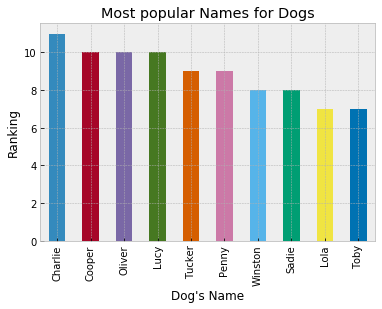

In [66]:
name_list = master['name'].value_counts().head(10)
name_list.plot(kind='bar', title = 'Most popular Names for Dogs');
plt.ylabel('Ranking')
plt.xlabel("Dog's Name");

In [67]:
data= master.name.to_string(index =False).strip()

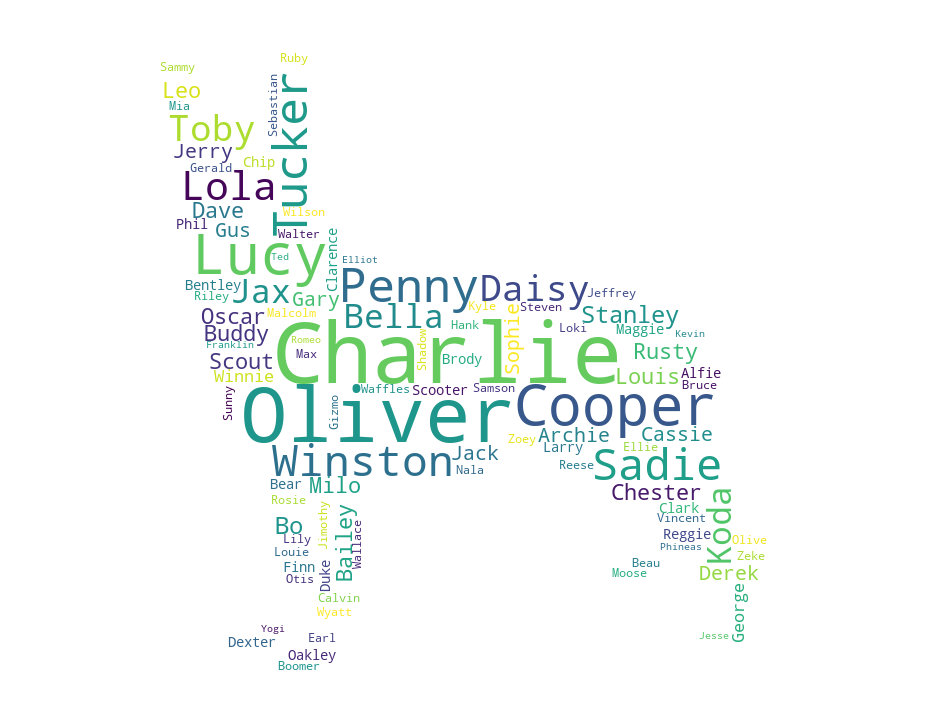

In [68]:
# choose the mask from a google dog pictures
url = 'https://cdn.pixabay.com/photo/2013/11/28/11/32/dog-220324_960_720.jpg'
r = requests.get(url)
mask = np.array(Image.open(BytesIO(r.content)))

# set parameters
wc = WordCloud(background_color= 'white',
mask = mask,
max_words=100)
   
wc.generate(data)
wc.to_image()


sours:https://www.datacamp.com/community/tutorials/wordcloud-python

## <font color=green># What is the most popular dog type?</font> 


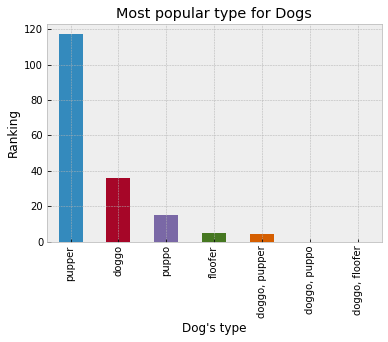

In [69]:
name_type = master['dog_type'].value_counts().head(10)
name_type.plot(kind='bar', title = 'Most popular type for Dogs');
plt.ylabel('Ranking')
plt.xlabel("Dog's type");


## <font color=green># what is the most month users post a dog photo?</font> 

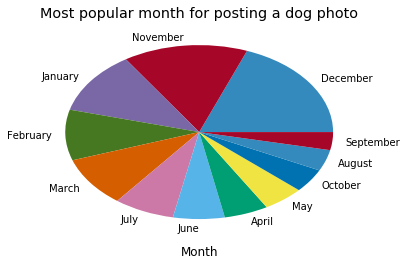

In [74]:
master.timestamp.apply(lambda x: x.month_name()).value_counts().plot('pie')
plt.title("Most popular month for posting a dog photo")
plt.ylabel('')
plt.xlabel("Month");


## <font color=green>#What is the most source used to share dog's photo ?</font>

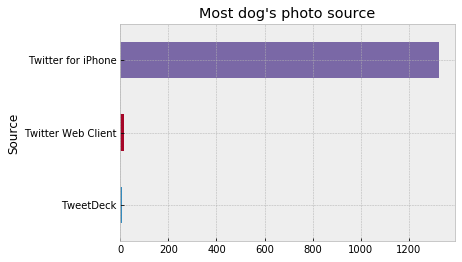

In [71]:
plt.title("Most dog's photo source")
master.source.value_counts().sort_values().plot.barh(stacked=True);
plt.ylabel('Source');

<hr>

                           done by:Amerah Albenhar